In [64]:
import numpy as np
import pandas as pd

In [65]:
df=pd.read_csv(r'C:\\Users\\Win7Ult\\Downloads\\Fraud_check.csv')

In [66]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [67]:
df['fraud']='No'

In [68]:
a=df[df['Taxable.Income']<=30000].index.values

In [69]:
for i in a:
    df['fraud'].iloc[i]='Yes'

C:\Users\Win7Ult\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [70]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,NO,Single,68833,50047,10,YES,No
1,YES,Divorced,33700,134075,18,YES,No
2,NO,Married,36925,160205,30,YES,No
3,YES,Single,50190,193264,15,YES,No
4,NO,Married,81002,27533,28,NO,No
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,No
596,YES,Divorced,69967,55369,2,YES,No
597,NO,Divorced,47334,154058,0,YES,No
598,YES,Married,98592,180083,17,NO,No


In [71]:
df['fraud'].unique()

array(['No', 'Yes'], dtype=object)

In [72]:
df['fraud'].value_counts()

No     476
Yes    124
Name: fraud, dtype: int64

In [73]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [74]:
df['Undergrad']=le.fit_transform(df['Undergrad'])

In [75]:
df['Marital.Status']=le.fit_transform(df['Marital.Status'])

In [76]:
df['Urban']=le.fit_transform(df['Urban'])

In [77]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,0,2,68833,50047,10,1,No
1,1,0,33700,134075,18,1,No
2,0,1,36925,160205,30,1,No
3,1,2,50190,193264,15,1,No
4,0,1,81002,27533,28,0,No
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,No
596,1,0,69967,55369,2,1,No
597,0,0,47334,154058,0,1,No
598,1,1,98592,180083,17,0,No


In [78]:
x=df.iloc[:,:6]

In [79]:
y=df.iloc[:,-1]

In [91]:
from sklearn.preprocessing import normalize

In [92]:
x=normalize(x)

In [93]:
x

array([[0.00000000e+00, 2.35006687e-05, 8.08810766e-01, 5.88068984e-01,
        1.17503344e-04, 1.17503344e-05],
       [7.23351273e-06, 0.00000000e+00, 2.43769379e-01, 9.69833219e-01,
        1.30203229e-04, 7.23351273e-06],
       [0.00000000e+00, 6.08252943e-06, 2.24597399e-01, 9.74451628e-01,
        1.82475883e-04, 6.08252943e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.93697773e-01, 9.55898330e-01,
        0.00000000e+00, 6.20479514e-06],
       [4.87079466e-06, 4.87079466e-06, 4.80221387e-01, 8.77147315e-01,
        8.28035092e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.20977238e-01, 8.53570566e-01,
        8.63626416e-05, 0.00000000e+00]])

In [94]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [96]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4,min_samples_split=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=3)

In [97]:
preds = model.predict(x_train)

In [101]:
preds1 = model.predict(x_test)

In [98]:
preds

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No'

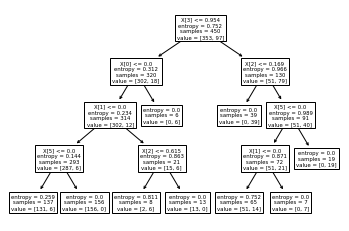

In [99]:
tree.plot_tree(model);

In [100]:
print(classification_report(y_train,preds))

              precision    recall  f1-score   support

          No       0.95      0.99      0.97       353
         Yes       0.97      0.79      0.88        97

    accuracy                           0.95       450
   macro avg       0.96      0.89      0.92       450
weighted avg       0.95      0.95      0.95       450



In [102]:
print(classification_report(y_test,preds1))

              precision    recall  f1-score   support

          No       0.94      0.97      0.96       123
         Yes       0.83      0.74      0.78        27

    accuracy                           0.93       150
   macro avg       0.89      0.85      0.87       150
weighted avg       0.92      0.93      0.92       150



### data-2

In [28]:
df1=pd.read_csv(r'C:\\Users\\Win7Ult\\Downloads\\Company_Data.csv')

In [29]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [30]:
df1['ShelveLoc']=le.fit_transform(df1['ShelveLoc'])

In [31]:
df1['US']=le.fit_transform(df1['US'])

In [32]:
df1['Urban']=le.fit_transform(df1['Urban'])

In [33]:
df1['sale']='high'

In [34]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,high
4,4.15,141,64,3,340,128,0,38,13,1,0,high
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,high
397,7.41,162,26,12,368,159,2,40,18,1,1,high
398,5.94,100,79,7,284,95,0,50,12,1,1,high


In [35]:
a=df1[df1['Sales']<7.49].index.values

In [36]:
for i in a:
    df1['sale'].iloc[i]='no'

C:\Users\Win7Ult\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [37]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,no
4,4.15,141,64,3,340,128,0,38,13,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,no
397,7.41,162,26,12,368,159,2,40,18,1,1,no
398,5.94,100,79,7,284,95,0,50,12,1,1,no


In [38]:
x1=df1.iloc[:,1:11]
y1=df1.iloc[:,-1]

In [39]:
from sklearn.preprocessing import normalize
x2=normalize(x1)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1)

In [41]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import  DecisionTreeClassifier


In [55]:
model1= DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_split=15,max_features='sqrt')


In [56]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, max_features='sqrt', min_samples_split=15)

In [57]:
y_pred2=model1.predict(x_train)

In [58]:
y_pred1=model1.predict(x_test)

In [59]:
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

        high       0.82      0.89      0.85       155
          no       0.87      0.79      0.83       145

    accuracy                           0.84       300
   macro avg       0.85      0.84      0.84       300
weighted avg       0.85      0.84      0.84       300



In [60]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

        high       0.58      0.67      0.63        46
          no       0.68      0.59      0.63        54

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.64      0.63      0.63       100



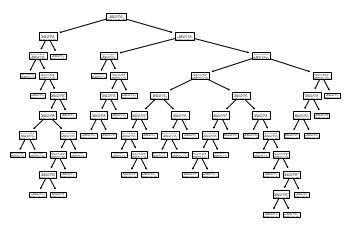

In [61]:
tree.plot_tree(model1);

In [49]:
a=range(3,50)
a=list(a)

In [50]:
param_grid ={'criterion':['gini','entropy'],'max_depth':a,'min_samples_split':a,'max_features':['auto', 'sqrt', 'log2'],}

In [53]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model1, param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                              max_features='sqrt',
                                              min_samples_split=6),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                               13, 14, 15, 16, 17, 18, 19, 20,
                                               21, 22, 23, 24, 25, 26, 27, 28,
                                               29, 30, 31, 32, ...]})

In [54]:
print(grid.best_score_)
print(grid.best_params_)

0.7866666666666667
{'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 15}
